# Provided Sample Code

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [2]:
# learn a line segment

In [3]:
# generate data for a line segment [0.5, 1.5) (y=1) and 
# for points outside the line segent [1.5, 2.0] (y=0)

npts = 1000

X1 = np.zeros((npts,1))
y0 = np.zeros(npts)
y1 = np.zeros(npts)

for i in range(0,npts): 
    X1[i,0] = np.random.uniform(0.0,2.0)         
    if ((X1[i,0]<=0.5) or (X1[i,0]>1.5)):
        y1[i] = 0
    else:
        y1[i] = 1


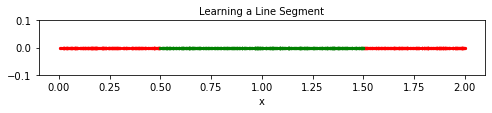

In [4]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 1))
plt.title('Learning a Line Segment', fontsize='medium')
plt.xlabel('x')
plt.ylabel('')
plt.scatter(x = X1[y1==0, 0], y=y0[y1==0], color='red', label='0', s=5)
plt.scatter(x = X1[y1==1, 0], y=y0[y1==1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.1)
plt.show()

In [5]:
# split data into 50% training and 50% test data

X1_train, X1_test, y1_train, y1_test = train_test_split(
         X1, y1, test_size=0.50, random_state=0)

if (npts==20):
    print(np.sort(X1_train.transpose()))

In [6]:
# Fit for various depth trees
MaxDepth = 4
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X1_train, y1_train)

    X1_combined = np.vstack((X1_train, X1_test))
    y1_combined = np.hstack((y1_train, y1_test))

    # optional outputs
    z = tree.apply(X1_combined)
    #print(z)
    dp = tree.decision_path(X1_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X1_train,y1_train)
    Errors[i,1] = 1 - tree.score(X1_test,y1_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.248 0.27
2 0.0 0.0020000000000000018
3 0.0 0.0020000000000000018
4 0.0 0.0020000000000000018


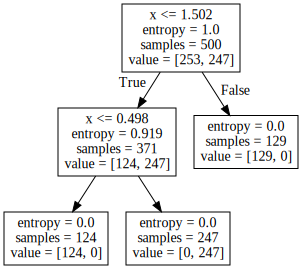

In [7]:
# plot the final decision gree
export_graphviz(tree, out_file='T1.dot', feature_names=['x'])
with open('T1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
#
# If you want to generate a .png file of the image of the tree use the following steps:
# 1) Install GraphViz on your computer
# 2) Open a command prompt
# 3) Go to the directory in which the T1.dot file was stored 
#    when you ran the preceeding cell
#    It will probably be the same directory that this .ipynb file is in
# 4) Run the command:  dot -Tpng T1.dot -o T1.png
# 5) The image will be in the file T1.png
#

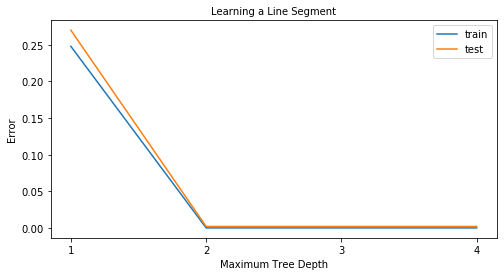

In [9]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Line Segment', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [10]:
# learn an axis-aligned rectangle

In [11]:
# generate data for an axis-aligned rectangle with vertex coordinates
# (0.5,0.5),(0.5,1.5),(1.5,0.5),(1.5,1.5) 
# for points inside the rectangke, y=1 and for points outside the rectangle, y=0.

npts = 10000

X2 = np.zeros((npts,2))
y2 = np.zeros(npts)

for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0) 
    if ((X2[i,0]<=0.5) or (X2[i,0]>1.5) or (X2[i,1]<=0.5) or (X2[i,1]>1.5)):
        y2[i] = 0
    else:
        y2[i] = 1
        

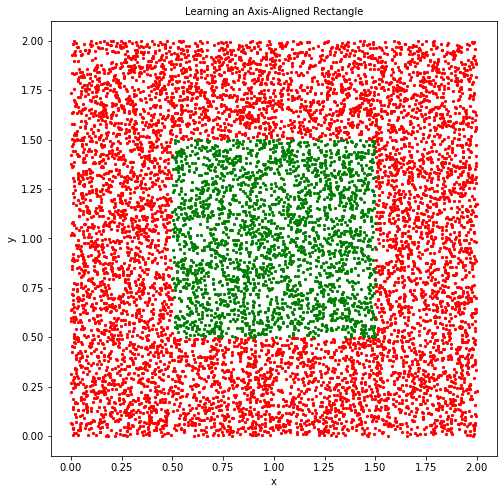

In [12]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Axis-Aligned Rectangle', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [13]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)


In [14]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X2_train, y2_train)

    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #print(z)
    dp = tree.decision_path(X2_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.24819999999999998 0.25739999999999996
2 0.24260000000000004 0.25060000000000004
3 0.121 0.12480000000000002
4 0.0 0.0
5 0.0 0.0


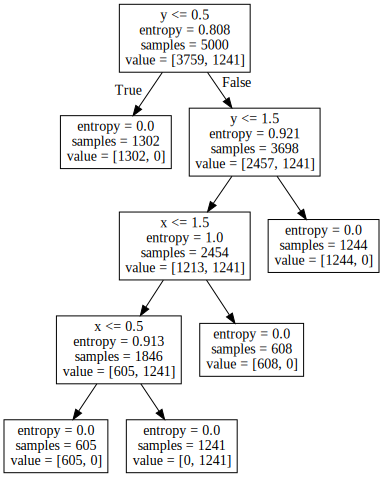

In [15]:
# plot the final decision gree
export_graphviz(tree, out_file='T2.dot', feature_names=['x','y'])
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

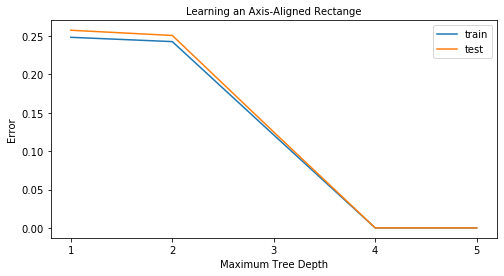

In [16]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Axis-Aligned Rectange', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [17]:
# learn an origin-aligned circle using x and y using only x and y as features

In [18]:
# generate data for an origin-centered circle centered with radius 0.5 

npts = 10000

X5 = np.zeros((npts,5))
y5 = np.zeros(npts)

for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) 
    X5[i,1] = np.random.uniform(-1.0,1.0) 
    if ((X5[i,0]**2+X5[i,1]**2) >= 0.5):
        y5[i] = 0
    else:
        y5[i] = 1
  

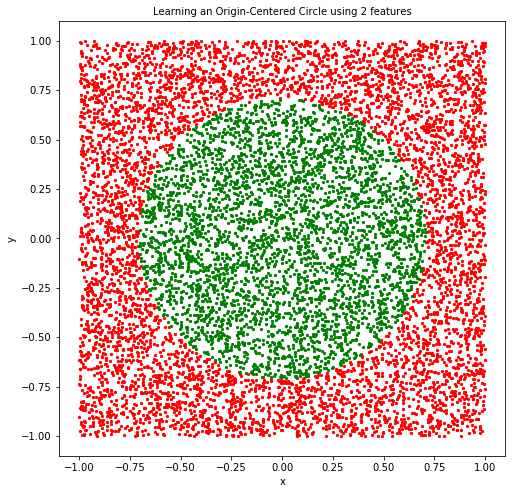

In [19]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 2 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [20]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [21]:
# Fit for various depth trees
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X5_train, y5_train)

    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #print(z)
    dp = tree.decision_path(X5_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.39880000000000004 0.39880000000000004
2 0.2964 0.29900000000000004
3 0.18259999999999998 0.18979999999999997
4 0.0796 0.0826
5 0.07779999999999998 0.08840000000000003
6 0.06440000000000001 0.07099999999999995
7 0.04059999999999997 0.05120000000000002
8 0.025800000000000045 0.03259999999999996
9 0.016800000000000037 0.024599999999999955
10 0.006399999999999961 0.01880000000000004


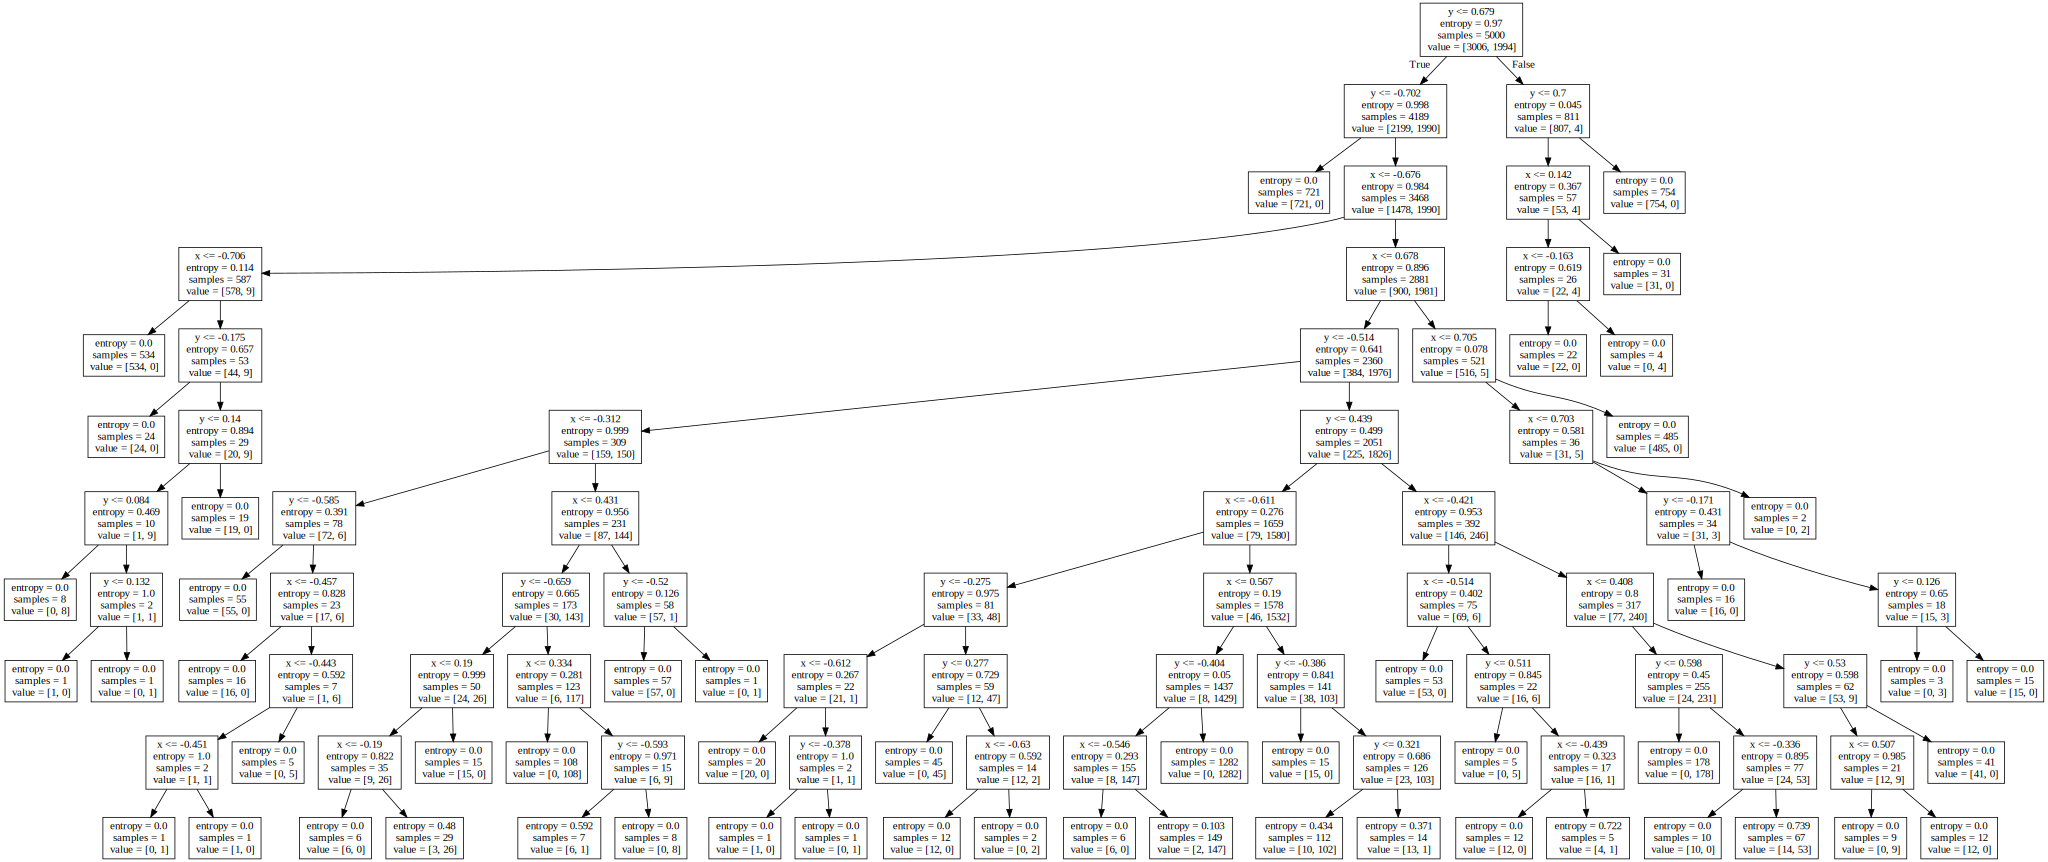

In [22]:
# plot the final decision gree
export_graphviz(tree, out_file='T5.dot', feature_names=['x','y','','',''])
with open('T5.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

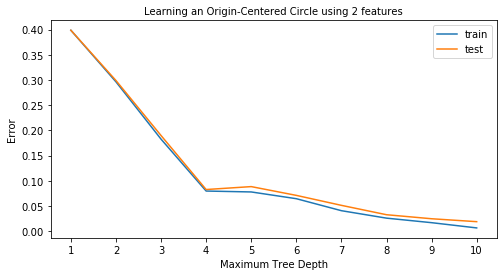

In [23]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [24]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 as the features

In [25]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

X5 = np.zeros((npts,5))
y5 = np.zeros(npts)

for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) 
    X5[i,1] = np.random.uniform(-1.0,1.0)
    X5[i,2] = X5[i,0]**2
    X5[i,3] = X5[i,0]*X5[i,1]
    X5[i,4] = X5[i,1]**2
    
    
    if (((X5[i,0])**2+(X5[i,1])**2) >= 0.5):
        y5[i] = 0
    else:
        y5[i] = 1
  

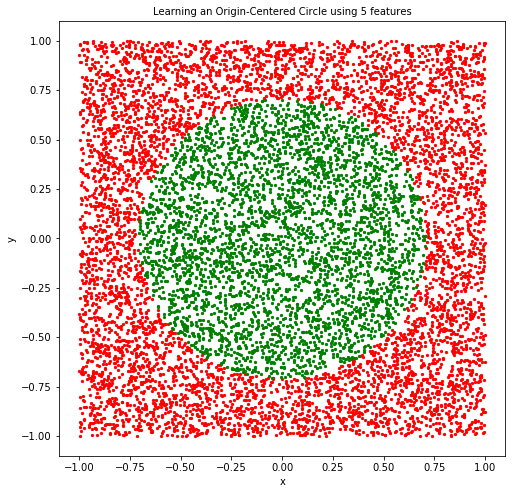

In [26]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 5 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [27]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [28]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X5_train, y5_train)

    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #print(z)
    dp = tree.decision_path(X5_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.29059999999999997 0.29359999999999997
2 0.07079999999999997 0.07940000000000003
3 0.050799999999999956 0.06120000000000003
4 0.013399999999999967 0.019199999999999995
5 0.012599999999999945 0.017800000000000038
6 0.0040000000000000036 0.008199999999999985
7 0.0036000000000000476 0.008199999999999985
8 0.0006000000000000449 0.005800000000000027
9 0.00039999999999995595 0.006199999999999983
10 0.0 0.00660000000000005


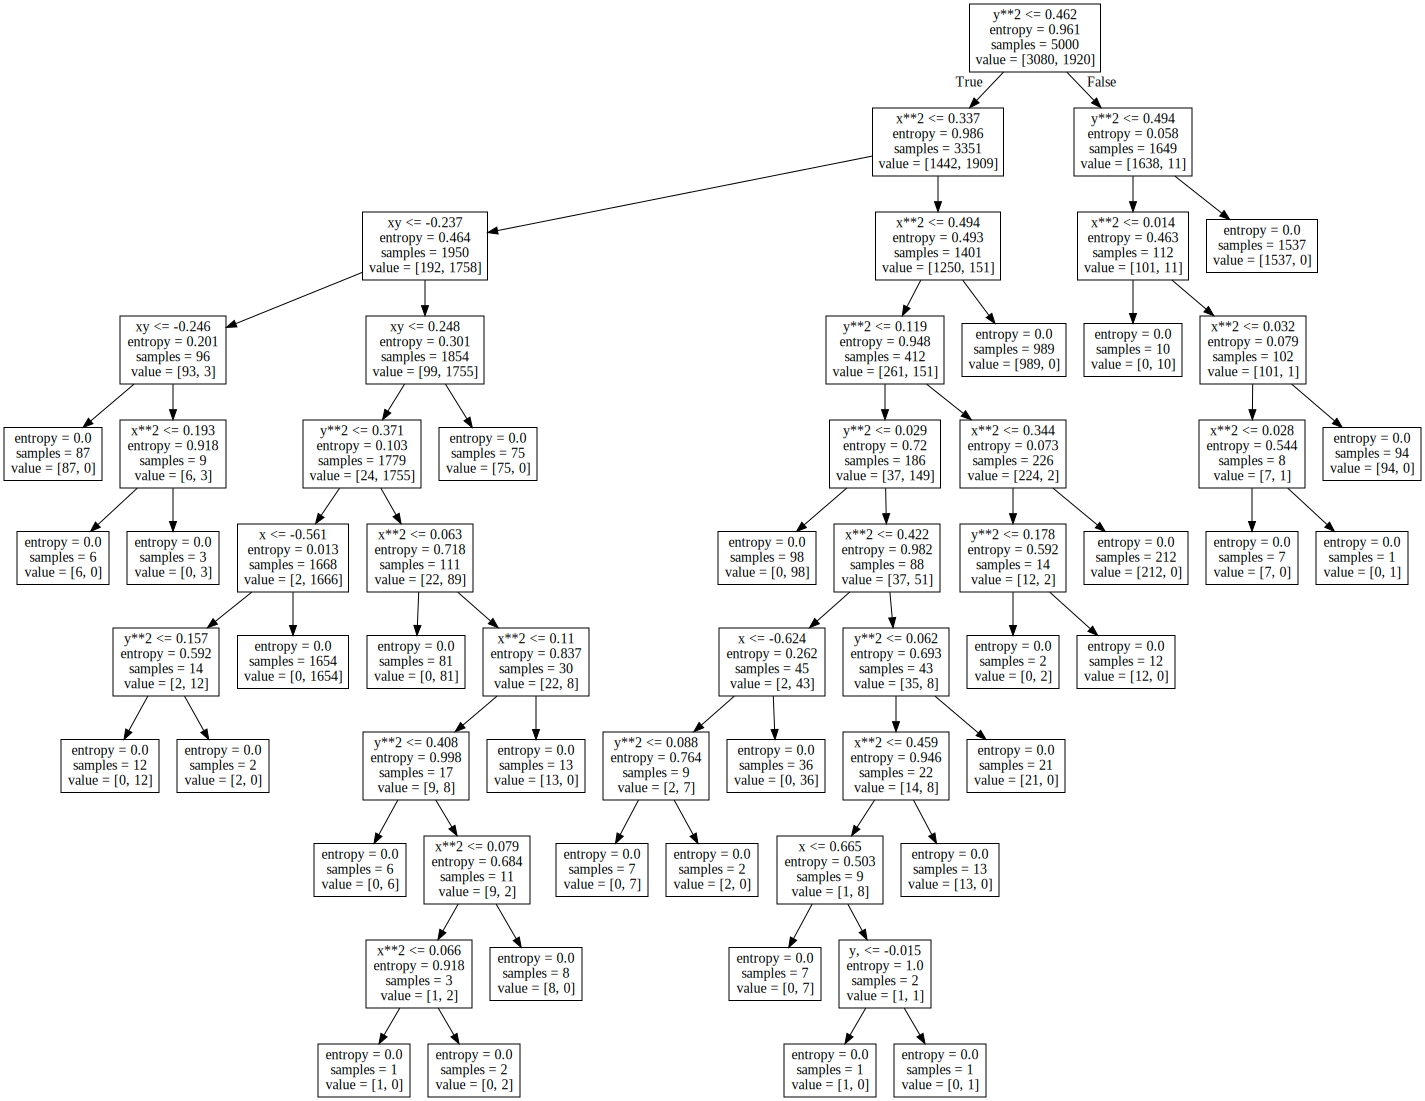

In [29]:
# plot the final decision gree
export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x**2','xy','y**2'])
with open('T5a.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

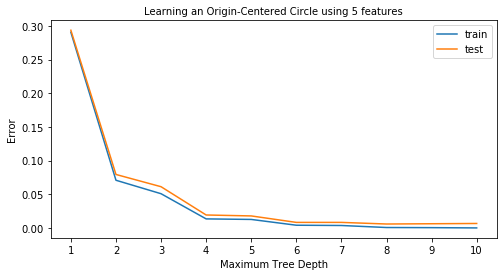

In [30]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 5 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [31]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 AND (x**2+y**2) as feature

In [32]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

X6 = np.zeros((npts,6))
y6 = np.zeros(npts)

for i in range(0,npts): 
    X6[i,0] = np.random.uniform(-1.0,1.0) 
    X6[i,1] = np.random.uniform(-1.0,1.0)
    X6[i,2] = X6[i,0]**2
    X6[i,3] = X6[i,0]*X5[i,1]
    X6[i,4] = X6[i,1]**2
    X6[i,5] = X6[i,0]**2+X6[i,1]**2
    
    
    
    if (((X6[i,0])**2+(X6[i,1])**2) >= 0.5):
        y6[i] = 0
    else:
        y6[i] = 1
  

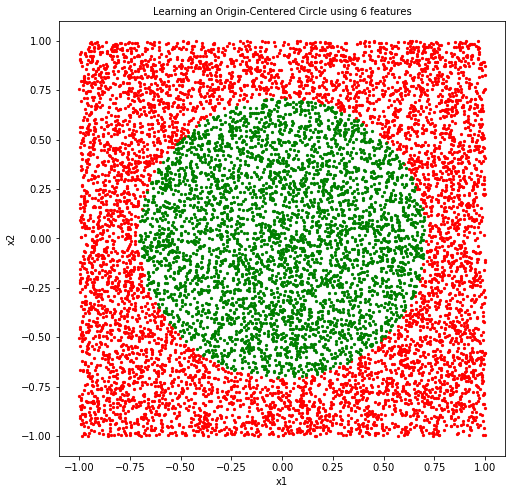

In [33]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X6[y6==0, 0], y = X6[y6==0, 1], color='red', label='0', s=5)
plt.scatter(x = X6[y6==1, 0], y = X6[y6==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [34]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X6_train, X6_test, y6_train, y6_test = train_test_split(
         X6, y6, test_size=0.50, random_state=0)


In [35]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X6_train, y6_train)

    X6_combined = np.vstack((X6_train, X6_test))
    y6_combined = np.hstack((y6_train, y6_test))

    # optional outputs
    z = tree.apply(X6_combined)
    #print(z)
    dp = tree.decision_path(X6_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X6_train,y6_train)
    Errors[i,1] = 1 - tree.score(X6_test,y6_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0


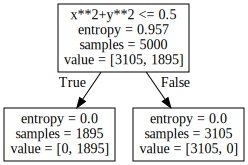

In [36]:
# plot the final decision gree
export_graphviz(tree, out_file='T6.dot', feature_names=['x','y,','x**2','xy','y**2','x**2+y**2'])
with open('T6.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

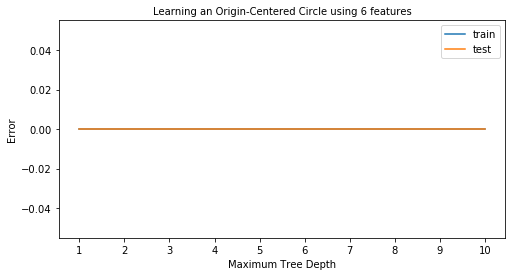

In [37]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


# Assignment 3

In [38]:
# learn a rhombus using x and y as features

In [39]:
npts = 10000

X7 = np.zeros((npts,2))
Y7 = np.zeros(npts)

for i in range(0,npts): 
    X7[i,0] = np.random.uniform(-1.0,1.0) 
    X7[i,1] = np.random.uniform(-1.0,1.0)

    if ((((2*X7[i,0])-X7[i,1])>-1) and (((2*X7[i,0])-X7[i,1])<1) and (((-2*X7[i,0])-X7[i,1])>-1) and (((-2*X7[i,0])-X7[i,1])<1)):
        Y7[i] = 0
    else:
        Y7[i] = 1

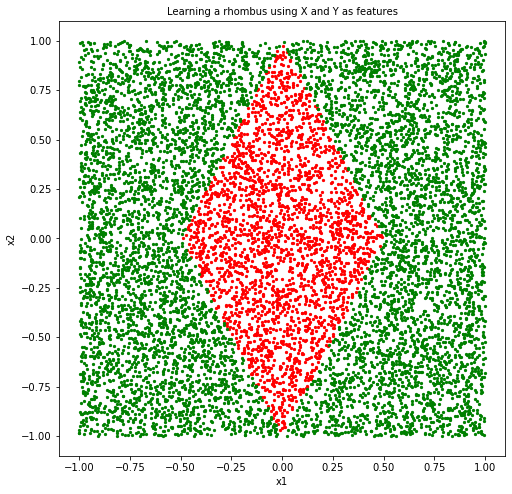

In [40]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a rhombus using X and Y as features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X7[Y7==0, 0], y = X7[Y7==0, 1], color='red', label='0', s=5)
plt.scatter(x = X7[Y7==1, 0], y = X7[Y7==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [41]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X7_train, X7_test, Y7_train, Y7_test = train_test_split(
         X7, Y7, test_size=0.50, random_state=0)

In [42]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X7_train, Y7_train)

    X7_combined = np.vstack((X7_train, X7_test))
    Y7_combined = np.hstack((Y7_train, Y7_test))

    # optional outputs
    z = tree.apply(X7_combined)
    #print(z)
    dp = tree.decision_path(X7_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X7_train,Y7_train)
    Errors[i,1] = 1 - tree.score(X7_test,Y7_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.2548 0.25360000000000005
2 0.17659999999999998 0.1916
3 0.13060000000000005 0.14400000000000002
4 0.09840000000000004 0.10099999999999998
5 0.08520000000000005 0.08620000000000005
6 0.05620000000000003 0.06040000000000001
7 0.032200000000000006 0.040200000000000014
8 0.022599999999999953 0.031000000000000028
9 0.014399999999999968 0.028800000000000048
10 0.006399999999999961 0.022199999999999998


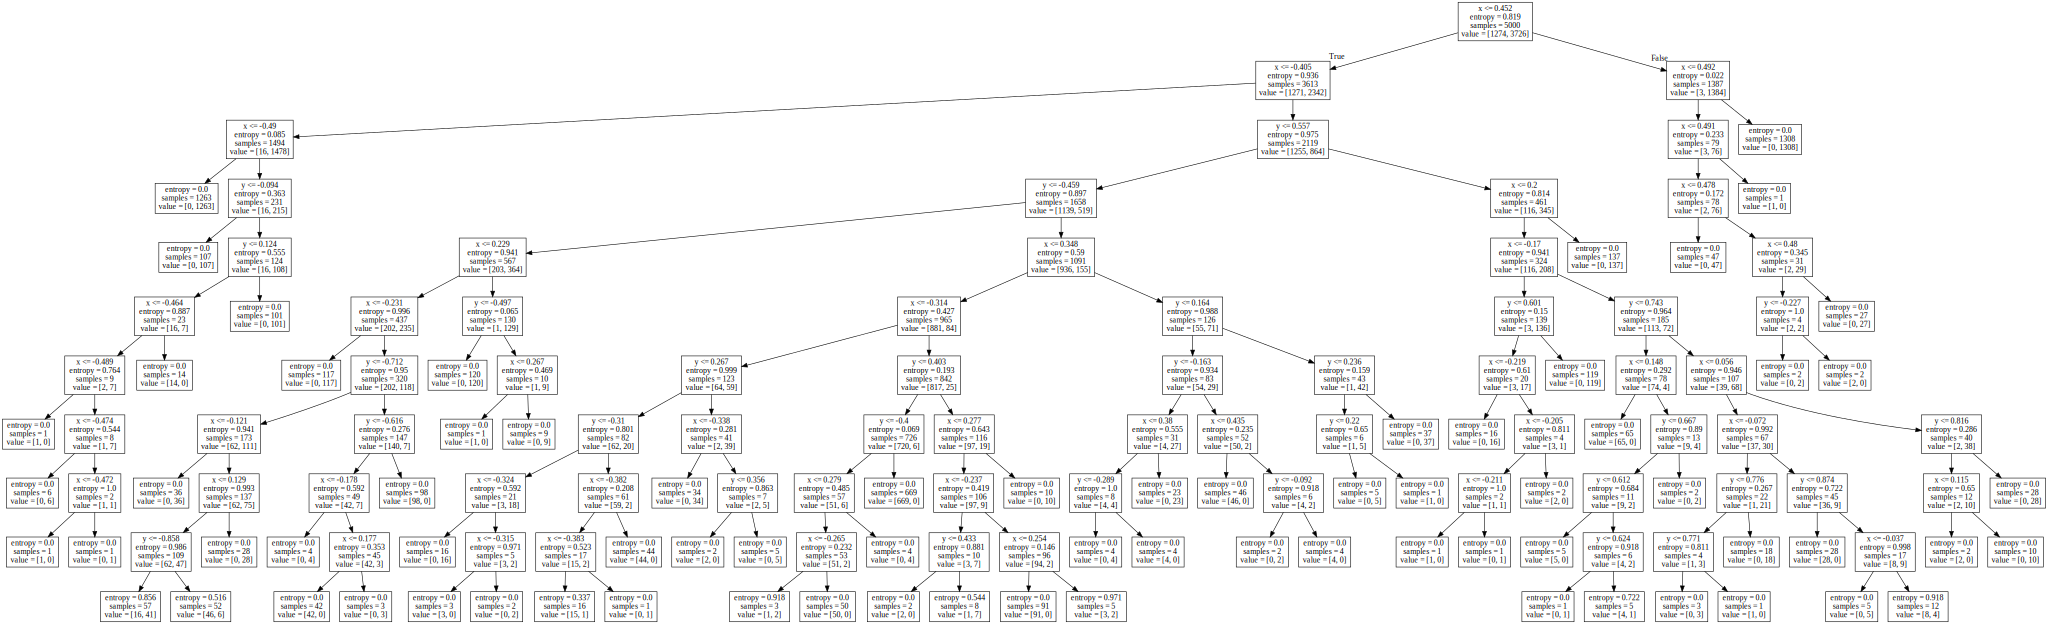

In [43]:
# plot the final decision gree
export_graphviz(tree, out_file='T7.dot', feature_names=['x','y'])
with open('T7.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

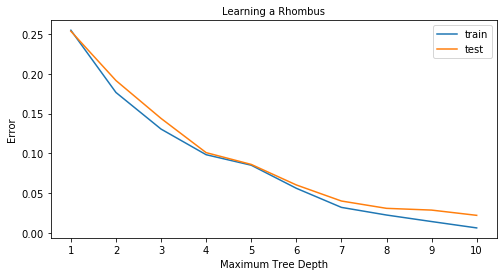

In [44]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Rhombus', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

In [45]:
# learn a rhombus using x, y, 2x-y, -2x-y as features

In [46]:
npts = 10000

X8 = np.zeros((npts,4))
Y8 = np.zeros(npts)

for i in range(0,npts): 
    X8[i,0] = np.random.uniform(-1.0,1.0) 
    X8[i,1] = np.random.uniform(-1.0,1.0)
    X8[i,2] = (2*X8[i,0])-X8[i,1]
    X8[i,3] = (-2*X8[i,0])-X8[i,1]

    if ((((2*X8[i,0])-X8[i,1])>-1) and (((2*X8[i,0])-X8[i,1])<1) and (((-2*X8[i,0])-X8[i,1])>-1) and (((-2*X8[i,0])-X8[i,1])<1)):
        Y8[i] = 0
    else:
        Y8[i] = 1

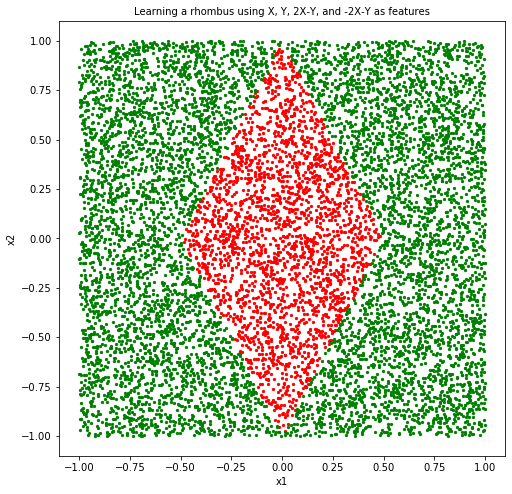

In [47]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a rhombus using X, Y, 2X-Y, and -2X-Y as features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X8[Y8==0, 0], y = X8[Y8==0, 1], color='red', label='0', s=5)
plt.scatter(x = X8[Y8==1, 0], y = X8[Y8==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [48]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X8_train, X8_test, Y8_train, Y8_test = train_test_split(
         X8, Y8, test_size=0.50, random_state=0)

In [49]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X8_train, Y8_train)

    X8_combined = np.vstack((X8_train, X8_test))
    Y8_combined = np.hstack((Y8_train, Y8_test))

    # optional outputs
    z = tree.apply(X8_combined)
    #print(z)
    dp = tree.decision_path(X8_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X8_train,Y8_train)
    Errors[i,1] = 1 - tree.score(X8_test,Y8_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.2502 0.24719999999999998
2 0.18720000000000003 0.17379999999999995
3 0.136 0.129
4 0.08540000000000003 0.08240000000000003
5 0.038000000000000034 0.03959999999999997
6 0.0 0.0006000000000000449
7 0.0 0.0006000000000000449
8 0.0 0.0006000000000000449
9 0.0 0.0006000000000000449
10 0.0 0.0006000000000000449


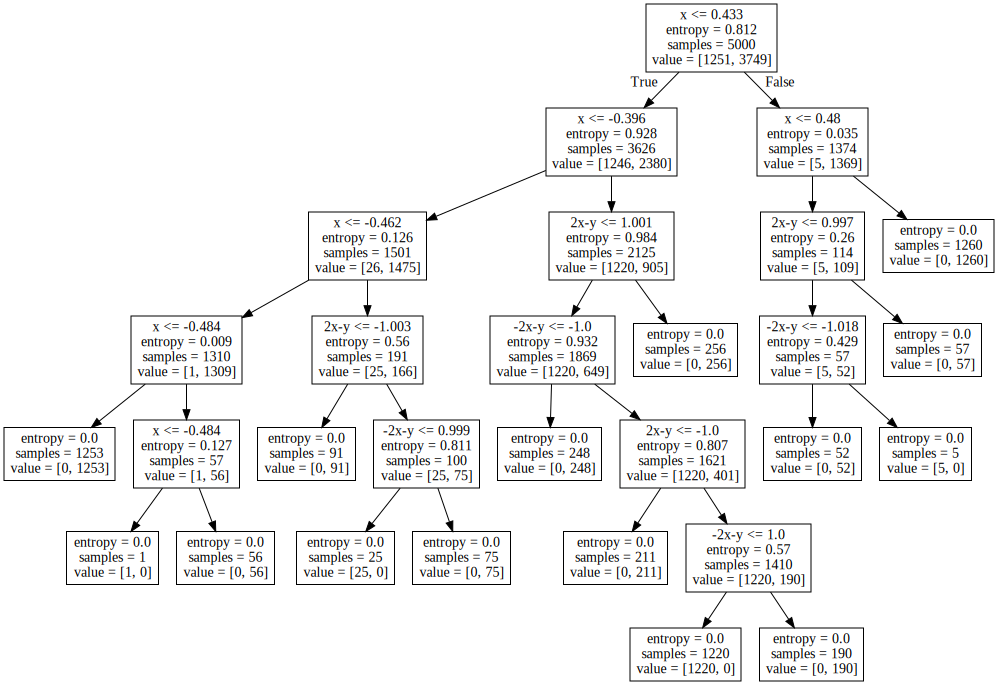

In [50]:
# plot the final decision gree
export_graphviz(tree, out_file='T8.dot', feature_names=['x','y','2x-y','-2x-y'])
with open('T8.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

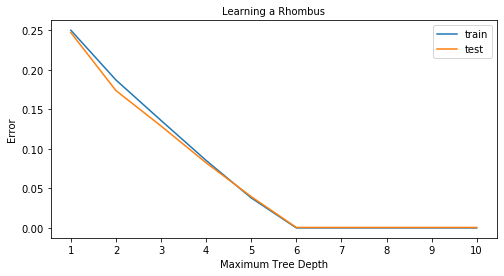

In [51]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Rhombus', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

# Discussion

In this assignment, we were asked to create a decision tree using features that we selected to learn a rhombus with interior angles of 45 degrees and 135 degrees. In the first run, I used X and Y as features and saw that it resulted in a very large and complex decision tree. This is much like the case with the circle where the tree made many perpendicular lines in order to emulate a curve. In this case it is using many perpendicular lines to emulate a line. On the second run however, I used X, Y, 2X-Y, and -2X-Y as the features. This reduces the complexity of the tree greatly compared to the first run. This can also be seen in the error graphs for the two runs. On the first run, the error gradually decreses as the maximum tree depth increases. However on the second run, the error levels out after a maximum tree depth of six, which is much bettwe than the first run.